In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50
import PIL.Image
import matplotlib.pyplot as mpimg
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/New folder/Chest_xray_Corona_Metadata.csv')
train_df.shape

(5910, 6)

In [ ]:
train_df.head(5)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [ ]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']

In [ ]:
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")


Shape of train data : (5286, 6)
Shape of test data : (624, 6)


In [ ]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64


In [ ]:
def creat_dir():
    try:
        os.makedirs('../working/train/Pnemonia')
        os.makedirs('../working/train/Normal')
        os.makedirs('../working/test/Pnemonia')
        os.makedirs('../working/test/Normal')
    except:
        pass

In [ ]:
train_data[train_data.Label == 'Pnemonia'].head(10)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1341,1341,person101_virus_188.jpeg,Pnemonia,TRAIN,NaN,Virus
1342,1342,person101_virus_187.jpeg,Pnemonia,TRAIN,NaN,Virus
1343,1343,person1019_virus_1708.jpeg,Pnemonia,TRAIN,NaN,Virus
1344,1344,person1019_virus_1707.jpeg,Pnemonia,TRAIN,NaN,Virus
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,NaN,bacteria
1346,1346,person1018_virus_1706.jpeg,Pnemonia,TRAIN,NaN,Virus
1347,1347,person1018_bacteria_2949.jpeg,Pnemonia,TRAIN,NaN,bacteria
1348,1348,person1017_bacteria_2948.jpeg,Pnemonia,TRAIN,NaN,bacteria
1349,1349,person1016_virus_1704.jpeg,Pnemonia,TRAIN,NaN,Virus
1350,1350,person1016_bacteria_2947.jpeg,Pnemonia,TRAIN,NaN,bacteria


In [ ]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64


In [ ]:
train_data[train_data.Label == 'Normal'].head()


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
creat_dir()


In [ ]:
#train data

#COVID-19
to_train_pnemonia = '../working/train/Pnemonia/'
source_train = '/content/drive/MyDrive/New folder/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
move_train_pnemonia = train_data[train_data.Label == 'Pnemonia']['X_ray_image_name'].values
for i in tqdm(move_train_pnemonia):
    path = os.path.join(source_train,i)
    shutil.copy(path,to_train_pnemonia)
    
#Normal
to_train_normal = '../working/train/Normal/'
move_train_normal = train_data[train_data.Label == 'Normal']['X_ray_image_name'].values
for i in tqdm(move_train_normal):
    path = os.path.join(source_train,i)
    shutil.copy(path,to_train_normal)


100%|██████████| 1342/1342 [15:10<00:00,  1.47it/s]


In [ ]:
#test data

#COVID-19
to_test_pnemonia = '../working/test/Pnemonia/'
source_test = '/content/drive/MyDrive/New folder/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
move_test_pnemonia = test_data[test_data.Label == 'Pnemonia']['X_ray_image_name'].values
for i in tqdm(move_test_pnemonia):
    path = os.path.join(source_test,i)
    shutil.copy(path,to_test_pnemonia)

#Normal
to_test_normal = '../working/test/Normal/'
move_test_normal = test_data[test_data.Label == 'Normal']['X_ray_image_name'].values
for i in tqdm(move_test_normal):
    path = os.path.join(source_test,i)
    shutil.copy(path,to_test_normal)

100%|██████████| 234/234 [01:23<00:00,  2.79it/s]


In [ ]:
# Model configuration
batch_size = 64
img_width, img_height, img_num_channels = 224,224,3
no_epochs = 15
verbosity = 1
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Function to build, compile and train the model

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)
train_generator = train_datagen.flow_from_directory('../working/train/',
                                                    target_size=(224,224),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset = 'training')

valid_generator = train_datagen.flow_from_directory('../working/train/',
                                                    target_size=(224,224),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset = 'validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('../working/test/',
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 4230 images belonging to 2 classes.
Found 1056 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#define input shape
INPUT_SHAPE = (224,224,3) 

#get the pretrained model
base_model = keras.applications.VGG16(input_shape= INPUT_SHAPE,
                                include_top=False,
                                weights='imagenet')

#set the trainable method of covolution layer as false
# why set to false?? because we don't want to mess up the pretrained weights of the model!!
base_model.trainable = False


model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#add a earlystopping callback to stop the training if the model is not learning anymore
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

#let's just choose adam as our optimizer, we all love adam anyway.
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator,
          epochs=10,callbacks=[callbacks],verbose=1)

Epoch 1/10
67/67 [==============================] - 1591s 24s/step - loss: 0.4070 - accuracy: 0.8154 - val_loss: 0.2886 - val_accuracy: 0.8864
Epoch 2/10
67/67 [==============================] - 1578s 24s/step - loss: 0.2905 - accuracy: 0.8726 - val_loss: 0.2473 - val_accuracy: 0.8797
Epoch 3/10
67/67 [==============================] - 1576s 24s/step - loss: 0.2631 - accuracy: 0.8863 - val_loss: 0.2253 - val_accuracy: 0.9138
Epoch 4/10
67/67 [==============================] - 1577s 24s/step - loss: 0.2390 - accuracy: 0.9040 - val_loss: 0.2031 - val_accuracy: 0.9138
Epoch 5/10
67/67 [==============================] - 1577s 24s/step - loss: 0.2259 - accuracy: 0.9092 - val_loss: 0.1797 - val_accuracy: 0.9413
Epoch 6/10
67/67 [==============================] - 1578s 24s/step - loss: 0.2176 - accuracy: 0.9135 - val_loss: 0.1753 - val_accuracy: 0.9337
Epoch 7/10
67/67 [==============================] - 1577s 24s/step - loss: 0.2021 - accuracy: 0.9201 - val_loss: 0.1940 - val_accuracy: 0.9271

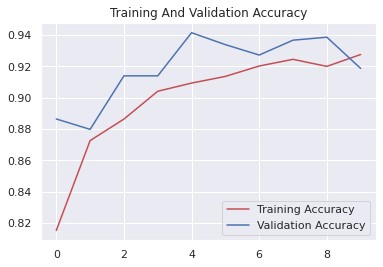

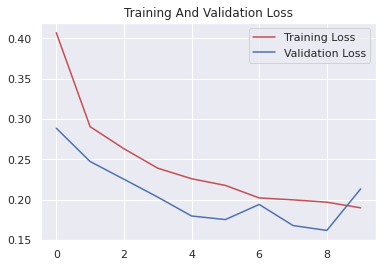

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs,acc,"r",label="Training Accuracy")
plt.plot(epochs,val_acc,"b",label="Validation Accuracy")
plt.title("Training And Validation Accuracy")

plt.legend()
plt.figure()

plt.plot(epochs,loss,"r",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.title("Training And Validation Loss")

plt.legend()
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9274231791496277
validation_accuracy 0.9185606241226196


In [ ]:
label = valid_generator.classes
print(label[:-200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
pred= model.predict(valid_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (valid_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices[:-200])
# print (labels)
# print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
print(cf)

[[268 788]
 [  0   0]]


In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,268,268
1,788,788
All,1056,1056


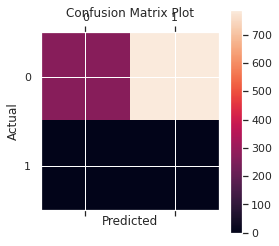

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();